<a href="https://colab.research.google.com/github/apoorvapu/data_science/blob/main/SentimentAnalysis_1.6Mtweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Make data directory if it doesn't exist
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/investigating-sentiment-analysis/data/training.1600000.processed.noemoticon.csv.zip -P data
!unzip -n -d data data/training.1600000.processed.noemoticon.csv.zip
!rm "data/training.1600000.processed.noemoticon.csv.zip"

--2025-04-06 22:39:41--  https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/investigating-sentiment-analysis/data/training.1600000.processed.noemoticon.csv.zip
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85088192 (81M) [application/zip]
Saving to: ‘data/training.1600000.processed.noemoticon.csv.zip’

training.1600000.pr 100%[===================>]  81.15M  30.6MB/s    in 2.7s    

2025-04-06 22:39:44 (30.6 MB/s) - ‘data/training.1600000.processed.noemoticon.csv.zip’ saved [85088192/85088192]

Archive:  data/training.1600000.processed.noemoticon.csv.zip
  inflating: data/training.1600000.processed.noemoticon.csv  


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import gc

## Read the tweets in

In [5]:
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv("data/training.1600000.processed.noemoticon.csv", encoding='latin-1', names=columns)
# Drop rows where 'text' or 'target' column contains null values
df.dropna(subset=['text', 'target'], inplace=True)
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df.drop(columns=['ids', 'flag', 'date', 'user'], inplace=True)
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [7]:
!rm -rf data

In [8]:
import gc
gc.collect()
df['target'].value_counts()

,count
target,
0,800000
4,800000


In [9]:
import re

def clean_tweet(text):
    text = text.lower()  # lowercase
    text = re.sub(r'@[\w_]+', '', text)  # remove mentions
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation/numbers
    return text

df['text'] = df['text'].apply(clean_tweet)
df.head()


,target,text
0,0,awww thats a bummer you shoulda got david car...
1,0,is upset that he cant update his facebook by t...
2,0,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire
4,0,no its not behaving at all im mad why am i her...


In [10]:
df['tweet_length'] = df['text'].apply(lambda x: len(str(x).split()))
df.sort_values(by='tweet_length', ascending=False).head(20)

,target,text,tweet_length
981534,4,do it do it do it do it do it do it do it do i...,40
1097562,4,im blue da ba dee da ba di da ba dee da ba di ...,39
1590300,4,i am high amp u can see i am lost amp u find...,36
852964,4,dont care bout ppl who r saying u r too fat am...,35
381873,0,i feel like a fool he treated me bad damn it w...,35
336344,0,i never get c u as often as i likei never get...,35
675528,0,ti hum wa mnh ko t i n o ng c vb ngy to ko chu...,35
751261,0,my sis is away so long now its weird i go into...,35
532718,0,okay im up im up wow the sun is out the sky i...,35
689569,0,that is wat alway happen at skool if im they d...,35


In [11]:
df.drop(columns=['tweet_length'], inplace=True)

In [9]:
!pip install -q transformers

In [12]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("microsoft/MiniLM-L12-H384-uncased")
model = AutoModel.from_pretrained("microsoft/MiniLM-L12-H384-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/133M [00:00<?, ?B/s]

In [13]:
inputs = tokenizer(
    "Your text here",
    return_tensors="pt",
    padding=True,
    truncation=True,  # Ensures text longer than the max_length gets truncated
    max_length=40    # Set a max_length, e.g., 512 for the typical BERT-like models
)

# Get embeddings
outputs = model(**inputs)

# The embeddings are stored in the last_hidden_state
embeddings = outputs.last_hidden_state.mean(dim=1)  # Mean pooling for sentence embedding

In [14]:
print(embeddings.shape)  # Should be (1, 384) for MiniLM-L12-H384-uncased

torch.Size([1, 384])


In [15]:
# Define the device (GPU if available, otherwise fallback to CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model and move it to the selected device
model = model.to(device)

# Define a function to process tweets in batches
def get_batch_embeddings(texts, batch_size=256):
    embeddings_list = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]

        # Tokenize the batch (no need to move the tokenizer to the device)
        inputs = tokenizer(batch_texts,
                           padding=True,
                           truncation=True,
                           max_length=35,
                           return_tensors="pt").to(device)  # Move inputs to GPU

        # Get model outputs (token-level embeddings)
        with torch.no_grad():
            outputs = model(**inputs)

        # Mean pooling
        batch_embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()  # Move embeddings back to CPU before converting to numpy
        embeddings_list.extend(batch_embeddings)

    return embeddings_list

# Now, apply batch processing
tweets = df['text'].tolist()
embeddings = get_batch_embeddings(tweets)

# Save embeddings to disk incrementally if needed
np.save('tweet_embeddings.npy', np.array(embeddings))


model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

In [16]:
df.head()

,target,text
0,0,awww thats a bummer you shoulda got david car...
1,0,is upset that he cant update his facebook by t...
2,0,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire
4,0,no its not behaving at all im mad why am i her...


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 1. Load your tweet embeddings
embeddings = np.load('tweet_embeddings.npy')

# 2. Ensure df['target'] is clean
df = df.drop(columns=['text'])
gc.collect()
y = df['target'].values  # Sentiment labels (0 or 4 in Sentiment140)
del df  # Release memory
gc.collect()

0

In [13]:
# Optional: Convert 4 (positive) to 1 for binary classification
y = (y == 4).astype(int)

# 3. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    embeddings, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Parameters
chunk_size = 100000  # Adjust based on memory
n_chunks = len(X_train) // chunk_size + int(len(X_train) % chunk_size != 0)

# Initialize model with warm_start
clf = LogisticRegression(solver='saga', max_iter=300, warm_start=True)

# Fit in chunks
for i in range(n_chunks):
    start = i * chunk_size
    end = min((i + 1) * chunk_size, len(X_train))
    print(f"Training chunk {i+1}/{n_chunks} on rows {start}:{end}")

    X_chunk = X_train[start:end]
    y_chunk = y_train[start:end]

    clf.fit(X_chunk, y_chunk)  # With warm_start=True, continues training from last fit




Training chunk 1/13 on rows 0:100000
Training chunk 2/13 on rows 100000:200000
Training chunk 3/13 on rows 200000:300000
Training chunk 4/13 on rows 300000:400000
Training chunk 5/13 on rows 400000:500000
Training chunk 6/13 on rows 500000:600000
Training chunk 7/13 on rows 600000:700000
Training chunk 8/13 on rows 700000:800000
Training chunk 9/13 on rows 800000:900000
Training chunk 10/13 on rows 900000:1000000
Training chunk 11/13 on rows 1000000:1100000
Training chunk 12/13 on rows 1100000:1200000
Training chunk 13/13 on rows 1200000:1280000


In [16]:
del embeddings  # Release memory
gc.collect()

138

In [17]:
# Evaluate
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.78      0.78      0.78    160000
           1       0.78      0.78      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



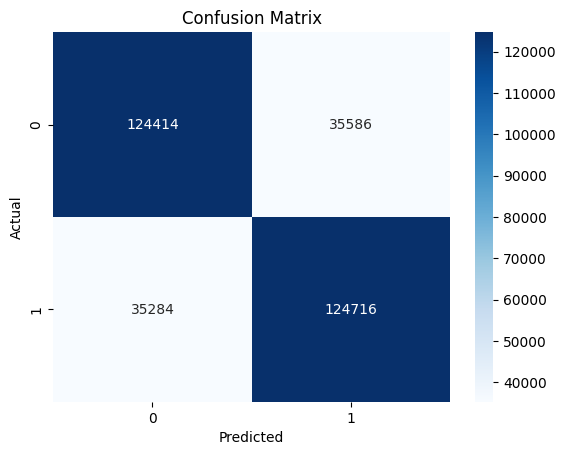

In [18]:
# 8. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
import xgboost as xgb

# Convert to XGBoost DMatrix (optimized format)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for binary classification with GPU
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'tree_method': 'gpu_hist',  # Use GPU
    'predictor': 'gpu_predictor',
    'max_depth': 6,
    'eta': 0.1,
    'verbosity': 1
}

# Train model
bst = xgb.train(params, dtrain, num_boost_round=100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:33:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:33:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


In [20]:
# Predict
y_pred_prob = bst.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluation
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:33:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.77      0.78      0.77    160000
           1       0.77      0.76      0.77    160000

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



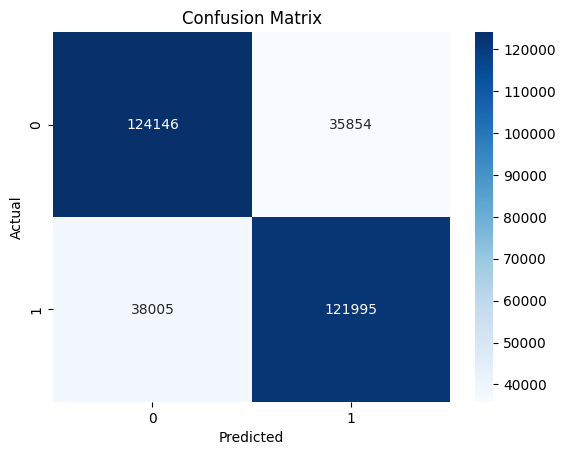

In [21]:
# 8. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Use sklearn-compatible wrapper
xgb_clf = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', objective='binary:logistic')

# Grid search parameters (keep small to avoid long runtime)
param_grid = {
    'max_depth': [4, 6, 10],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid,
                           scoring='f1', cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_



In [ ]:
# Evaluate
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# 8. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()